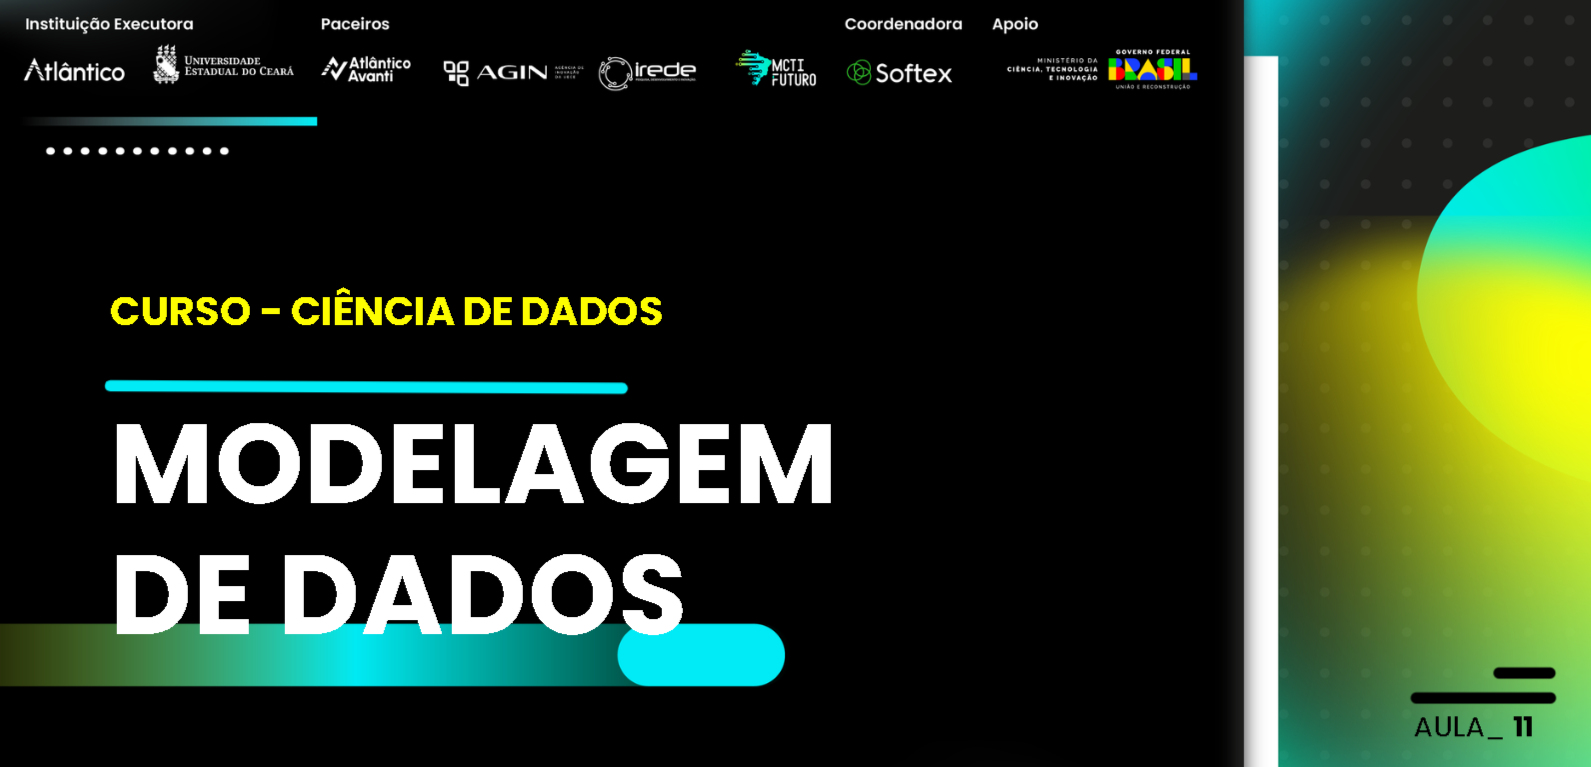



### **Modelagem de dados**

A preparação de dados é um dos passos mais importantes em um pipeline de Machine Learning. Dados brutos geralmente apresentam problemas como valores ausentes, variáveis em escalas diferentes, distribuições enviesadas ou categorias que precisam ser codificadas. Esses problemas podem impactar negativamente tanto a visualização quanto o desempenho dos algoritmos.

Esta atividade prática guiará você através das principais técnicas de preparação de dados e mostrará como cada uma pode ser usada para melhorar modelos e facilitar a análise dos dados. Além disso, exploraremos como normalização pode auxiliar na visualização de padrões e relações em gráficos.

Ao final desta atividade, você será capaz de:

1. Identificar e tratar valores ausentes.
2. Codificar variáveis categóricas com diferentes abordagens.
3. Normalizar e padronizar dados numéricos.
4. Aplicar transformações de escala para melhorar a visualização de dados.
5. Comparar métodos e analisar vantagens e limitações de cada abordagem.

### **Configuração do Ambiente**

**Importação de Bibliotecas**

In [1]:
# Importação de bibliotecas
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_openml, make_classification, make_blobs
from sklearn.preprocessing import (
    StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
)
from sklearn.impute import SimpleImputer
from scipy.cluster.vq import whiten
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração de estilo
sns.set(style="whitegrid")


**Carregamento de Dados**

**Dataset Real**

O dataset Credit-G, disponível no repositório OpenML, contém informações sobre clientes e é amplamente utilizado para tarefas de classificação relacionadas à concessão de crédito. O principal objetivo do dataset é prever se um cliente é considerado um bom ou mau pagador com base em características pessoais, financeiras e comportamentais.

**Descrição Geral**

*   É composto por 20 variáveis independentes (features) e uma variável alvo (target).

*  Atributos numéricos e categóricos, como: Status financeiro do cliente, Modo de pagamento de dívidas e etc.


*   A variável target indica se o cliente foi classificado como: Good (Bom Pagador) ou Bad (Mau Pagador)



In [2]:
# Carregar dataset do OpenML
data = fetch_openml(name="credit-g", as_frame=True)
df = data.data
df["target"] = data.target
df.head()



/usr/local/lib/python3.11/dist-packages/sklearn/datasets/_openml.py:323: UserWarning: Multiple active versions of the dataset matching the name credit-g exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=31
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=44096

  warn(warning_msg)


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad


**Dataset Sintético**

A função *make_classification* da *scikit-learn* é projetada para criar datasets sintéticos de classificação com configurações de controle detalhadas, como o número de características, a separabilidade das classes, a quantidade de ruído e a complexidade da tarefa. Isso permite que você simule cenários específicos e controle os parâmetros do dataset para testar como diferentes técnicas de aprendizado de máquina se comportam.

**Vantagens de Utilizar Dados Sintéticos:**

**Custo Zero:** Não é necessário coletar, limpar ou obter dados reais, que podem ser caros ou difíceis de acessar.

**Controle Total:** Você pode definir exatamente como deseja que seus dados se comportem (como introduzir desbalanceamento ou valores ausentes).

**Segurança e Privacidade:** Ao usar dados sintéticos, você evita questões de privacidade, especialmente em setores como saúde, onde os dados podem ser altamente sensíveis.

**Reprodutibilidade:** Dados sintéticos podem ser facilmente gerados para reproduzir testes e cenários específicos.

In [7]:
# Criar dataset sintético com sklearn
n_features = 5
X, y = make_classification(n_samples=1000, n_features=n_features,n_classes = 2,random_state=42)
df_synthetic = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(1, n_features+1)])
df_synthetic["target"] = y

# Introduzindo valores ausentes (NaN) nas colunas de características aleatoriamente
nan_indices = np.random.choice(df_synthetic.index, size=int(df.shape[0] * 0.1), replace=False)
df_synthetic.loc[nan_indices, 'feature_1'] = np.nan  # Adicionando NaN em 'Feature_1'

nan_indices = np.random.choice(df_synthetic.index, size=int(df.shape[0] * 0.08), replace=False)
df_synthetic.loc[nan_indices, 'feature_2'] = np.nan  # Adicionando NaN em 'Feature_2'

# Exibindo as primeiras linhas do DataFrame gerado
df_synthetic



,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,-0.439643,NaN,-0.822420,0.401366,-0.854840,0
1,2.822231,-2.480859,-1.147691,-2.101131,3.040278,1
2,1.618386,-1.369478,-2.084113,-1.179659,1.613602,1
3,1.659048,-0.615202,1.112688,-0.835098,-0.272205,1
4,1.849824,-1.679456,-0.926698,-1.402509,2.123129,1
...,...,...,...,...,...,...
995,-0.766350,0.768369,1.039112,0.615481,-1.056899,0
996,-2.847457,1.841002,-1.239107,1.805803,-1.450448,0
997,1.560390,-0.229041,-0.234408,-0.619576,-1.109856,1
998,0.886925,-0.222946,-1.308820,-0.396177,-0.404278,0


### **Tratamento de Valores Ausentes**

Identificar valores ausentes é essencial para compreender a qualidade dos dados. Muitas técnicas, como algoritmos de aprendizado de máquina, não funcionam bem com dados incompletos.

In [8]:
df_synthetic.isnull().sum()


,0
feature_1,100
feature_2,80
feature_3,0
feature_4,0
feature_5,0
target,0


**Indentificando a distribuição de classes**

In [9]:
df_synthetic['target'].value_counts()

,count
target,
0,500
1,500


**Remoção de Linhas Valores Ausentes.**

In [11]:
df_cleaned = df_synthetic.dropna()
df_cleaned['target'].value_counts()

,count
target,
1,421
0,409


**Imputação de Valores Ausentes**

A imputação preenche valores ausentes com estatísticas descritivas (média, mediana ou moda).

**Vantagens:**

Preserva o tamanho do dataset.
Rápido e fácil de implementar.

**Limitações:**

Pode introduzir viés.
Ignora relações entre variáveis no dataset.

In [12]:
# Imputar valores ausentes com a média
imputer = SimpleImputer(strategy="mean")
result_imputer = imputer.fit_transform(df_synthetic)
df_imputed = pd.DataFrame(result_imputer, columns=df_synthetic.columns)
df_imputed['target'].value_counts()
print("tamanho do dataset:", df_imputed.shape)
df_imputed.isnull().sum()

tamanho do dataset: (1000, 6)


,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,0
target,0


### Exercício de Pré-processamento de Dados - Opcional


**Objetivo:**  
O objetivo deste exercício é criar um dataset sintético, introduzir valores ausentes (NaN) e realizar o pré-processamento dos dados de duas formas: removendo as linhas com valores ausentes e utilizando o `SimpleImputer` para preenchê-los. O dataset deve ser gerado usando o `make_classification` da **scikit-learn**.

### Tarefas:
1. **Criação do Dataset Sintético**:
   - Use o `make_classification` para gerar um dataset com 3 atributos de características e 1 coluna alvo com 3 possíveis classes. Considere um dataset com 100 linhas.
   - Introduza valores ausentes (NaN) aleatoriamente nas colunas de atributos e na coluna alvo (target).
   - Certifique-se de que as colunas de atributos e a coluna alvo contenham valores ausentes.

2. **Pré-processamento do Dataset**:
   - **Remoção de Linhas com NaN**: Utilize o método `dropna()` do pandas para remover as linhas com valores ausentes.
   - **Preenchimento com `SimpleImputer`**: Use o `SimpleImputer` da **scikit-learn** para preencher os valores ausentes. Aplique a imputação usando a **média** para as colunas de atributos numéricos e a **moda** para a coluna alvo.

### Instruções:
- Importe as bibliotecas necessárias para o processo de criação do dataset e para o pré-processamento.
- Faça uso do `make_classification` para criar um dataset com 100 amostras e 3 classes.
- Introduza valores ausentes nas colunas de atributos e na coluna alvo.
- Realize os dois tipos de pré-processamento descritos acima.
- Exiba os resultados antes e depois da remoção de linhas com NaN e do preenchimento com `SimpleImputer`.




In [ ]:
#Resposta
#criação do Dataset Sintético

In [ ]:
#Resposta
#Pré-processamento do Dataset -  Remoção de Linhas com NaN

In [ ]:
#Pré-processamento do Dataset - Preenchimento com SimpleImputer

### **Codificação de Variáveis Categóricas**

**Label Econding**

O Label Encoding mapeia categorias para números inteiros, permitindo que os algoritmos processem essas variáveis como entradas numéricas. É especialmente útil para variáveis ordinais.

**Vantagens:**

Simples e eficiente, com baixo custo computacional.
Preserva a ordem natural de variáveis ordinais.

**Limitações:**

Pode introduzir ordens artificiais em variáveis nominais.
Algoritmos sensíveis à magnitude podem interpretar incorretamente os valores.

In [13]:
# Label Encoding para variáveis categóricas
le = LabelEncoder()
df["target_encoded"] = le.fit_transform(df["target"])
df


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target,target_encoded
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,67,none,own,2,skilled,1,yes,yes,good,1
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,22,none,own,1,skilled,1,none,yes,bad,0
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,49,none,own,1,unskilled resident,2,none,yes,good,1
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,45,none,for free,1,skilled,2,none,yes,good,1
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,53,none,for free,2,skilled,2,none,yes,bad,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking,12,existing paid,furniture/equipment,1736,<100,4<=X<7,3,female div/dep/mar,none,...,31,none,own,1,unskilled resident,1,none,yes,good,1
996,<0,30,existing paid,used car,3857,<100,1<=X<4,4,male div/sep,none,...,40,none,own,1,high qualif/self emp/mgmt,1,yes,yes,good,1
997,no checking,12,existing paid,radio/tv,804,<100,>=7,4,male single,none,...,38,none,own,1,skilled,1,none,yes,good,1
998,<0,45,existing paid,radio/tv,1845,<100,1<=X<4,4,male single,none,...,23,none,for free,1,skilled,1,yes,yes,bad,0


**One-Hot Encoding**

 O One-Hot Encoding transforma categorias em colunas binárias, onde o valor 1 indica a presença da categoria. Isso elimina qualquer relação ordinal implícita nos dados. Nesse caso, o *get_dummies* do pandas é uma alternativa prática para realizar One-Hot Encoding diretamente em dataframes, adicionando colunas binárias para cada categoria.

**Vantagens:**

Evita interpretação incorreta de ordem e  é ideal para variáveis nominais.

**Limitações:**

Aumenta a dimensionalidad e pode complicar modelos em datasets muito grandes.

In [14]:
# Aplicar One-Hot Encoding com pandas
df_encoded = pd.get_dummies(df, columns=["target"], prefix="encoded", drop_first=False)
df_encoded.head()



,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target_encoded,encoded_bad,encoded_good
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,none,own,2,skilled,1,yes,yes,1,False,True
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,none,own,1,skilled,1,none,yes,0,True,False
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,none,own,1,unskilled resident,2,none,yes,1,False,True
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,none,for free,1,skilled,2,none,yes,1,False,True
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,none,for free,2,skilled,2,none,yes,0,True,False


### **Normalização e Padronização**

**StandardScaler**

A padronização transforma os dados para que tenham uma média
𝜇
=
0
e um desvio padrão
𝜎
=1
Isso é realizado pela fórmula:

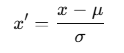


Essa técnica é essencial para algoritmos sensíveis à escala, como regressão logística, SVMs e redes neurais, onde diferentes amplitudes entre variáveis podem afetar o desempenho.

**Vantagens:**

Desempenho Aprimorado: Melhora a convergência de algoritmos baseados em gradiente (como redes neurais).

Uniformidade de Escala.

In [15]:
scaler = StandardScaler()
df[["credit_amount_norm_standard"]] = scaler.fit_transform(df[["credit_amount"]])
df.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target,target_encoded,credit_amount_norm_standard
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,none,own,2,skilled,1,yes,yes,good,1,-0.745131
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,none,own,1,skilled,1,none,yes,bad,0,0.949817
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,none,own,1,unskilled resident,2,none,yes,good,1,-0.416562
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,none,for free,1,skilled,2,none,yes,good,1,1.634247
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,none,for free,2,skilled,2,none,yes,bad,0,0.566664


**Transformação Logarítimica**

A transformação logarítmica é amplamente usada para lidar com distribuições altamente enviesadas, onde a maior parte dos dados se concentra em uma faixa estreita de valores, mas com algumas observações extremamente altas (outliers). A fórmula básica aplicada é
𝑥
′
=
log
⁡
(
𝑥
+
1
)
, garantindo que valores zero ou negativos não causem erros computacionais.

A transformação reduz a amplitude dos valores, comprimindo números grandes e expandindo os pequenos, tornando a distribuição mais simétrica. Isso é particularmente útil em modelos baseados em regressão linear e outros algoritmos que assumem distribuições normais para variáveis.

**Vantagens:**

Redução de Viés: Diminui o impacto de outliers nos dados.

Melhoria de Modelagem: Dados transformados frequentemente atendem melhor às premissas de normalidade e linearidade.

Aplicação Versátil: Útil em variáveis como renda, preços, e outras métricas que possuem distribuições enviesadas.

**Limitações:**

Perda de Intuição: Os valores transformados podem ser menos interpretáveis.

Dependência de Dados Não-Negativos: Não funciona em valores negativos sem ajustes específicos (como deslocamentos constantes).

Relação Não Linear: Em alguns casos, a transformação pode distorcer relações entre variáveis, dificultando a interpretação dos coeficientes em modelos lineares.


In [16]:
# Aplicando transformação logarítmica
df[["credit_amount_norm_log"]] = np.log(df[["credit_amount"]])
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,target,target_encoded,credit_amount_norm_standard,credit_amount_norm_log
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,own,2,skilled,1,yes,yes,good,1,-0.745131,7.063904
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,own,1,skilled,1,none,yes,bad,0,0.949817,8.691315
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,own,1,unskilled resident,2,none,yes,good,1,-0.416562,7.647786
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,for free,1,skilled,2,none,yes,good,1,1.634247,8.972337
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,for free,2,skilled,2,none,yes,bad,0,0.566664,8.490849


**Min-Max**

Teoria:
A normalização Min-Max transforma os dados para um intervalo fixo, geralmente entre 0 e 1. A fórmula usada é:

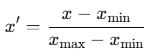

É útil para algoritmos que dependem da magnitude dos dados.

**Vantagens:**

Manutenção de Relações: Preserva a relação entre os valores originais.
Interpretação Fácil: Os valores resultantes estão em um intervalo bem definido.

**Limitações:**

Sensibilidade a Outliers: Outliers podem distorcer os resultados.
Dependência dos Limites: Requer conhecimento de
𝑥
min
x
min
​
  e
𝑥
max
x
max
​
  durante a inferência.

In [17]:
scaler = MinMaxScaler()
df[["credit_amount_norm_min_max"]] = scaler.fit_transform(df[["credit_amount"]])
df.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,existing_credits,job,num_dependents,own_telephone,foreign_worker,target,target_encoded,credit_amount_norm_standard,credit_amount_norm_log,credit_amount_norm_min_max
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,2,skilled,1,yes,yes,good,1,-0.745131,7.063904,0.050567
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,1,skilled,1,none,yes,bad,0,0.949817,8.691315,0.313690
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,1,unskilled resident,2,none,yes,good,1,-0.416562,7.647786,0.101574
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,1,skilled,2,none,yes,good,1,1.634247,8.972337,0.419941
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,2,skilled,2,none,yes,bad,0,0.566664,8.490849,0.254209


**Whiten**

A normalização pelo método whiten divide cada variável pela sua variância, assegurando que todas as variáveis tenham igual importância no cálculo de distâncias. Isso é particularmente útil em algoritmos de clustering, como K-means.

**Vantagens:**

Balanceamento de Variância: Evita que variáveis com maior variância dominem o modelo.
Compatibilidade com Clustering: Ideal para algoritmos como K-means.

**Limitações:**

Informação Perdida: Remove informações de magnitude.
Dependência Estatística: A normalização depende da variância, que pode ser sensível a outliers.

In [18]:
# Normalizar dados com a função whiten
df[["credit_amount_norm_whiten"]] = whiten(df[["credit_amount"]])
df.head()


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,job,num_dependents,own_telephone,foreign_worker,target,target_encoded,credit_amount_norm_standard,credit_amount_norm_log,credit_amount_norm_min_max,credit_amount_norm_whiten
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,...,skilled,1,yes,yes,good,1,-0.745131,7.063904,0.050567,0.414344
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,...,skilled,1,none,yes,bad,0,0.949817,8.691315,0.313690,2.109293
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,...,unskilled resident,2,none,yes,good,1,-0.416562,7.647786,0.101574,0.742913
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,...,skilled,2,none,yes,good,1,1.634247,8.972337,0.419941,2.793723
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,...,skilled,2,none,yes,bad,0,0.566664,8.490849,0.254209,1.726139


### **Aprimoramento da Visualização de Dados com Normalização**

**Min-Max**

Quando os dados possuem magnitudes diferentes, algumas variáveis podem dominar os gráficos, dificultando a análise visual. A normalização Min-Max pode ajudar ao escalar todos os valores para o mesmo intervalo.

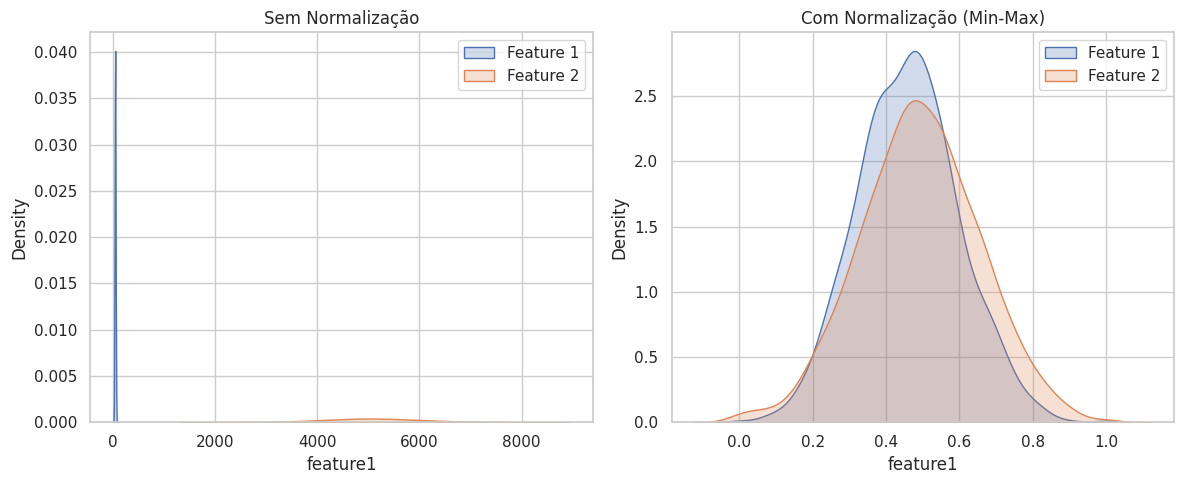

In [19]:
# Gerando um conjunto de dados com diferentes magnitudes
np.random.seed(42)
data = pd.DataFrame({
    "feature1": np.random.normal(50, 10, 1000),
    "feature2": np.random.normal(5000, 1000, 1000)
})

# Visualização sem normalização
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(data["feature1"], label="Feature 1", fill=True)
sns.kdeplot(data["feature2"], label="Feature 2", fill=True)
plt.title("Sem Normalização")
plt.legend()

# Normalizando os dados com MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data)
normalized_data = pd.DataFrame(normalized_data, columns=["feature1", "feature2"])

# Visualização com normalização
plt.subplot(1, 2, 2)
sns.kdeplot(normalized_data["feature1"], label="Feature 1", fill=True)
sns.kdeplot(normalized_data["feature2"], label="Feature 2",fill=True)
plt.title("Com Normalização (Min-Max)")
plt.legend()
plt.tight_layout()
plt.show()


**Normalização Logarítmica**

Variáveis com distribuições altamente enviesadas podem dificultar a análise visual, especialmente em histogramas ou gráficos de densidade. A transformação logarítmica pode reduzir o viés. A transformação logarítmica reduz a amplitude de valores grandes, compactando distribuições enviesadas. Isso torna padrões visuais mais claros em gráficos e facilita a análise de tendências.

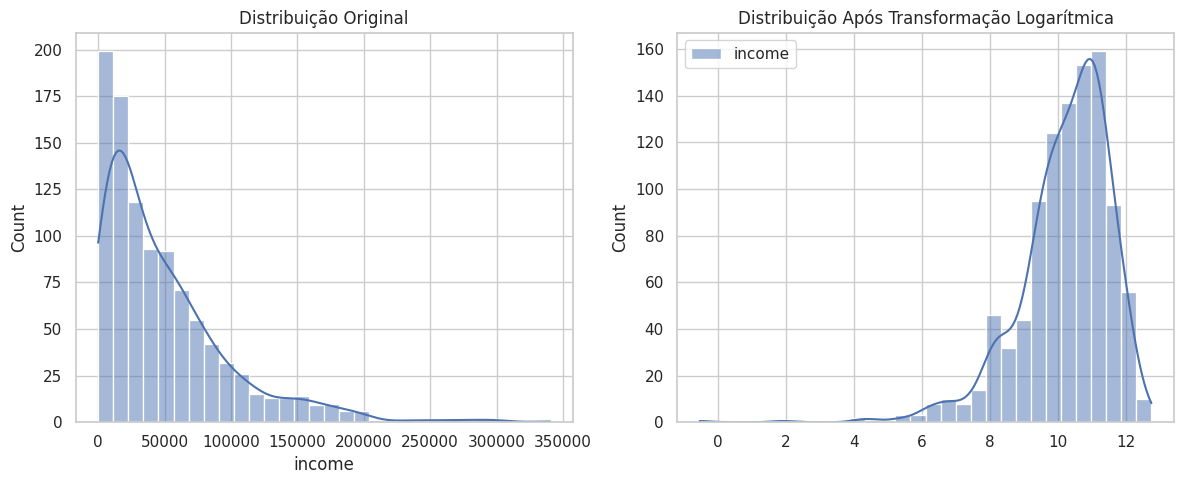

In [20]:
# Gerando dados com distribuição enviesada
skewed_data = pd.DataFrame({
    "income": np.random.exponential(scale=50000, size=1000)
})

# Visualização sem transformação
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(skewed_data["income"], bins=30, kde=True)
plt.title("Distribuição Original")

# Transformação logarítmica
log_data = np.log(skewed_data)

# Visualização após transformação
plt.subplot(1, 2, 2)
sns.histplot(log_data, bins=30, kde=True)
plt.title("Distribuição Após Transformação Logarítmica")
plt.tight_layout()
plt.show()


**StandardScaler**

Ao trabalhar com variáveis em diferentes unidades, como peso (kg) e altura (cm), a padronização com média zero e desvio padrão um facilita a análise visual conjunta. A padronização transforma as variáveis para que tenham média zero e desvio padrão unitário. Isso facilita a identificação de padrões e relações em gráficos bidimensionais.

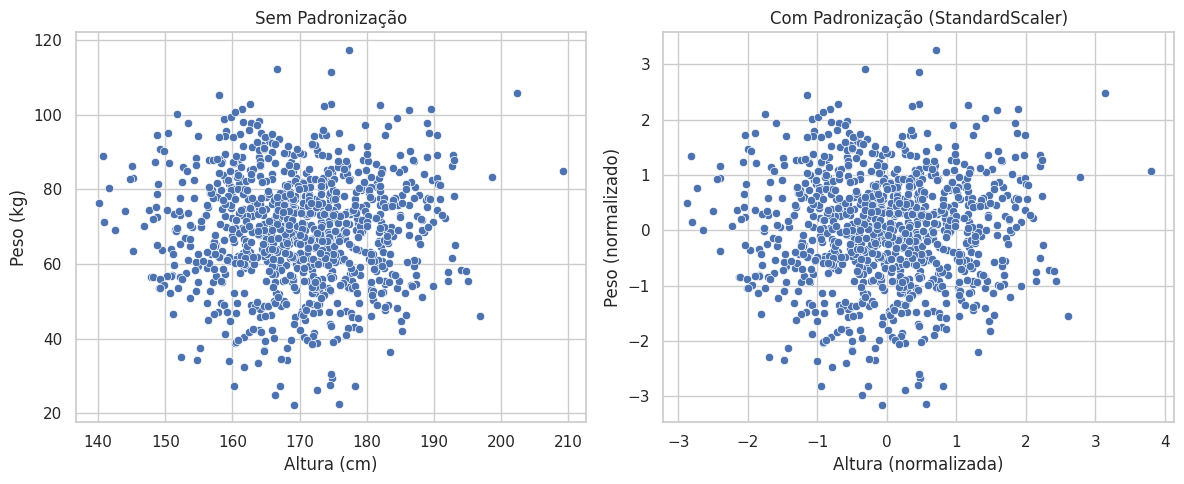

In [21]:
# Criando um dataset com variáveis em diferentes escalas
data = pd.DataFrame({
    "height_cm": np.random.normal(170, 10, 1000),
    "weight_kg": np.random.normal(70, 15, 1000)
})

# Visualização sem padronização
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=data["height_cm"], y=data["weight_kg"])
plt.title("Sem Padronização")
plt.xlabel("Altura (cm)")
plt.ylabel("Peso (kg)")

# Padronizando os dados com StandardScaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)
standardized_data = pd.DataFrame(standardized_data, columns=["height", "weight"])

# Visualização após padronização
plt.subplot(1, 2, 2)
sns.scatterplot(x=standardized_data["height"], y=standardized_data["weight"])
plt.title("Com Padronização (StandardScaler)")
plt.xlabel("Altura (normalizada)")
plt.ylabel("Peso (normalizado)")
plt.tight_layout()
plt.show()


**Whiten**

A função whiten ajusta os dados dividindo-os pela variância, igualando a contribuição de cada variável em gráficos de clusters. A normalização com whiten assegura que cada variável contribua igualmente para a formação de clusters. Isso reduz o impacto de variáveis com maior variância.

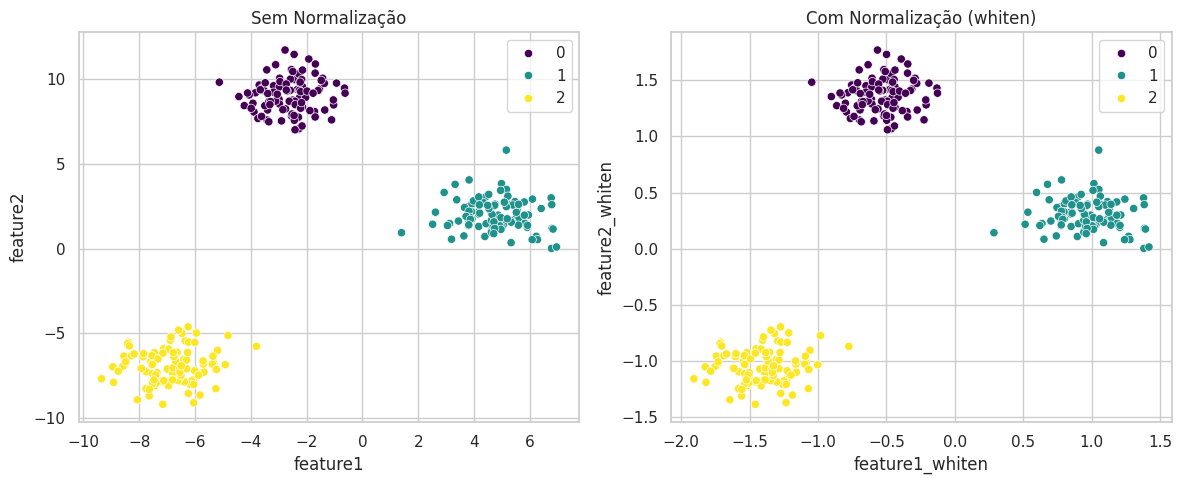

In [22]:
# Gerando dados simulados para clustering
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=300, centers=3, random_state=42)
df = pd.DataFrame(data, columns=["feature1", "feature2"])

# Visualização sem normalização
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=df["feature1"], y=df["feature2"], hue=labels, palette="viridis")
plt.title("Sem Normalização")

# Normalização com whiten
df["feature1_whiten"] = whiten(df["feature1"])
df["feature2_whiten"] = whiten(df["feature2"])

# Visualização com normalização
plt.subplot(1, 2, 2)
sns.scatterplot(x=df["feature1_whiten"], y=df["feature2_whiten"], hue=labels, palette="viridis")
plt.title("Com Normalização (whiten)")
plt.tight_layout()
plt.show()


### **Aplicação prática Geral** -  Aplicando Normalização de Dados em um Problema de Previsão de Rendimento Escolar.

Neste exercício, você aplicará técnicas de normalização de dados em um dataset sintético que simula informações relacionadas ao rendimento escolar de alunos. O objetivo é preparar os dados para aplicação em algoritmos de Machine Learning e analisar como a normalização afeta a visualização e o comportamento dos dados.

**Cenário:**

Você é um cientista de dados encarregado de ajudar uma escola a prever o rendimento escolar de seus alunos com base em informações como tempo de estudo, número de faltas e nível de participação em atividades extracurriculares. O dataset contém valores em escalas diferentes, o que pode impactar negativamente os resultados de alguns algoritmos de aprendizado de máquina.

Seu trabalho é normalizar esses dados para que fiquem em uma escala comparável.

Tarefas:

1. Pré-processar os Dados:

  Preencha os valores ausentes (utilize a média ou mediana).
  Visualize os dados antes da normalização usando gráficos de dispersão e histogramas.

2. Aplicar Técnicas de Normalização:

  Min-Max Scaling: Normalize os dados para uma faixa entre 0 e 1.
  Standard Scaling: Padronize os dados para uma distribuição com média 0 e desvio padrão 1.
  Normalização Logarítmica: Aplique logaritmo em uma característica com valores muito dispersos.
  Use a técnica Whiten (normalização de matriz de covariância esférica) em uma cópia do dataset.

3. Analisar os Efeitos da Normalização:

  Compare os dados antes e depois da normalização usando gráficos.




**Geração do Dataset Proposto**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

# Configurando semente para reprodutibilidade
np.random.seed(42)

# Gerando dataset com 3 características (tempo de estudo, número de faltas e participação)
X, y = make_classification(n_samples=200, n_features=3, n_informative=3, n_redundant=0,
                           n_classes=2, random_state=42)

# Convertendo X para DataFrame e adicionando a coluna alvo
df = pd.DataFrame(X, columns=['StudyTime', 'Absences', 'Participation'])
df['Performance'] = y  # Coluna alvo: rendimento escolar (0 = baixo, 1 = alto)

# Ajustando escalas para simular diferentes unidades
df['StudyTime'] = df['StudyTime'] * 10 + 50  # Tempo de estudo (em horas/semana)
df['Absences'] = df['Absences'] * 5 + 20     # Número de faltas
df['Participation'] = df['Participation'] * 100 + 500  # Nível de participação

# Introduzindo valores ausentes (NaN) aleatoriamente
nan_indices = np.random.choice(df.index, size=15, replace=False)
df.loc[nan_indices, 'StudyTime'] = np.nan

nan_indices = np.random.choice(df.index, size=10, replace=False)
df.loc[nan_indices, 'Absences'] = np.nan

nan_indices = np.random.choice(df.index, size=5, replace=False)
df.loc[nan_indices, 'Participation'] = np.nan

# Visualizando as primeiras linhas do dataset com valores ausentes
print("Dataset Sintético com Diferentes Escalas e Valores Ausentes:")
df.head()


Dataset Sintético com Diferentes Escalas e Valores Ausentes:


,StudyTime,Absences,Participation,Performance
0,52.242567,24.998171,585.249256,1
1,51.743773,27.311377,691.281149,1
2,54.434188,25.401373,447.921652,1
3,51.260363,23.742440,490.653427,1
4,52.626757,24.809743,508.245432,1


**Remoção de Linhas com NaN**

In [ ]:
# Remoção de linhas com valores ausentes
df_cleaned  =

**Preenchimento com Média (SimpleImputer)**

In [ ]:
# Preenchendo os valores ausentes com a média das colunas
df_imputed =

**Normalização dos Dados**

Min-Max Scaling

In [ ]:
df_minmax =

**Standard Scaling**

In [ ]:
df_standard =

**Normalização Logarítmica**

In [ ]:
df_log =

**Normalização com Whiten**

df_whiten =

**Visualização dos Dados**

In [ ]:
sns.pairplot(df_imputed, hue='Performance', diag_kind='kde')
plt.suptitle("Dados Originais", y=1.02)
plt.show()


**Após Min-Max Scaling**

In [ ]:
sns.pairplot(df_minmax, hue='Performance', diag_kind='kde')
plt.suptitle("Dados Após Min-Max Scaling", y=1.02)
plt.show()

**Após Standard Scaling**

In [ ]:
#resposta


**Após Normalização Logarítmica**

In [ ]:
#resposta

**Após Whiten**

In [ ]:
#resposta